# cca is generally performed on those columns that have maximum of 5%  missing values

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data_science_job.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

# separating those columns that have 5% or less missing values

In [5]:
cols = [val for val in df.columns if 5 > df[val].isnull().mean()*100 > 0]

In [6]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [7]:
df[cols].head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


# lets check the no. of categories in enrolled_university and education_level column

In [8]:
df["enrolled_university"].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [9]:
df["education_level"].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

# now checks how much percent values will remain after performing cca

In [10]:
new_df = df[cols]

In [11]:
(len(new_df.dropna())/ len(df))*100

89.68577095730244

In [12]:
len(df) - len(new_df.dropna()) # how many rows will be removed.

1976

In [13]:
new_df.dropna()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [14]:
# to check is our graph correctly working i've deleted random 1000 rows:
# new_df = new_df.drop((new_df.sample(n= 1000,random_state=42).index))

# now visually checking data behavior through plt

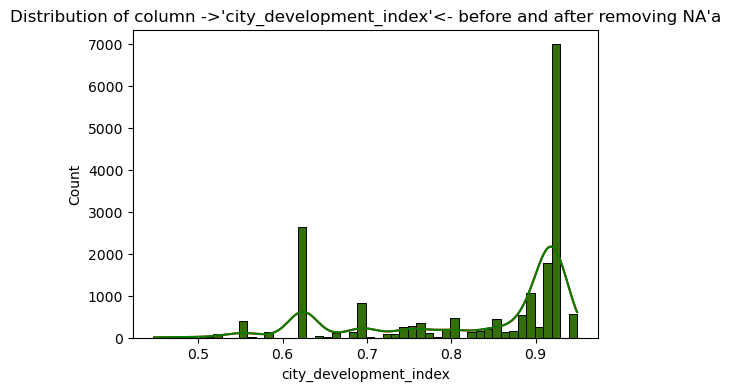

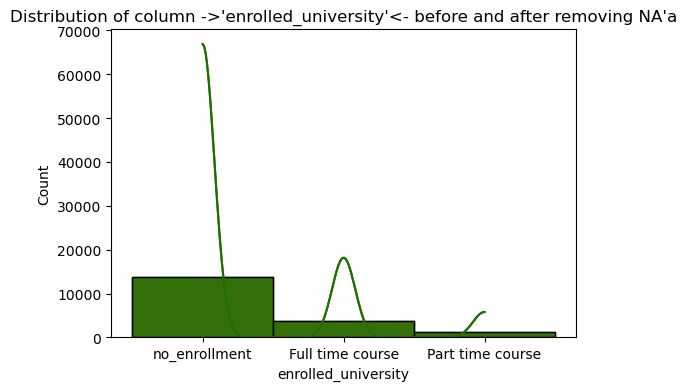

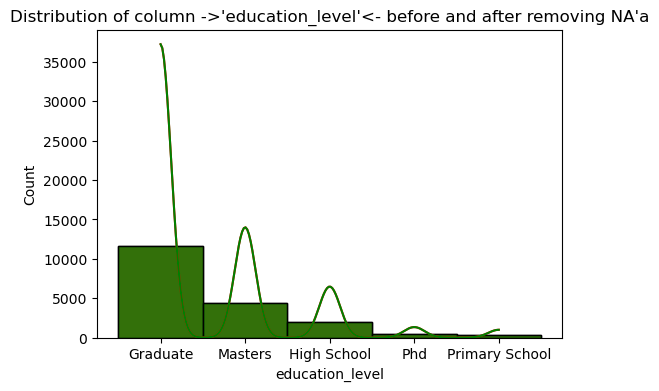

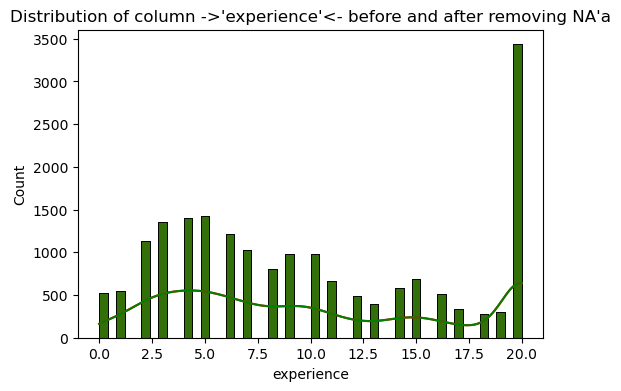

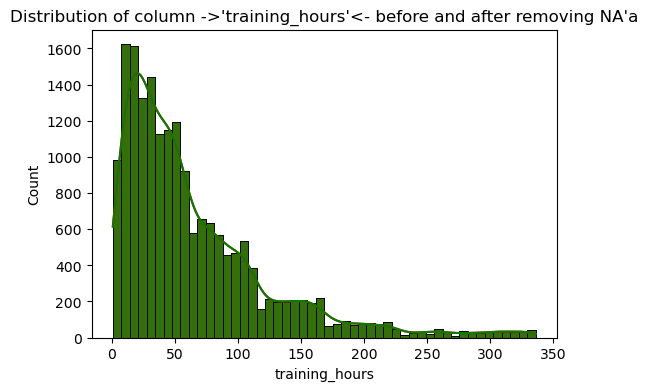

In [21]:
for col in new_df.columns:
    plt.figure(figsize = (6, 4))
    sns.histplot(x = df[col], bins=50 ,kde = True,  color="red", alpha = 0.8)
    sns.histplot(x = new_df[col], bins=50, kde = True, color="green", alpha = 0.8)
    
    plt.title(f"Distribution of column ->'{col}'<- before and after removing NA'a")
    plt.show()

###### 

# to see non numerical columns:

In [26]:
comp = pd.concat([
    (df["enrolled_university"].value_counts()/ len(df)),
    
    (new_df["enrolled_university"].value_counts()/ len(new_df))
],
    axis=1
)

comp.columns= ["original", "after cca"]
comp

,original,after cca
enrolled_university,,
no_enrollment,0.721213,0.721213
Full time course,0.196106,0.196106
Part time course,0.062533,0.062533


In [27]:
comp = pd.concat([
    (df["education_level"].value_counts()/ len(df)),
    
    (new_df["education_level"].value_counts()/ len(new_df))
],
    axis=1
)

comp.columns= ["original", "after cca"]
comp

,original,after cca
education_level,,
Graduate,0.605387,0.605387
Masters,0.227633,0.227633
High School,0.105282,0.105282
Phd,0.021610,0.021610
Primary School,0.016077,0.016077
